# Sommaire

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import exploration as ex # Fichier de fonctions

In [2]:
PATH_DATA = "/Users/alexandremonod/Python/OC_ML/projet_3_anticiper_consommation_ges_seattle/data/"

raw = pd.read_csv(f'{PATH_DATA}2016_Building_Energy_Benchmarking.csv')

## Nettoyage des données

In [3]:
ex.analyse_forme(raw)

+----+----------+-------------+---------------+------------+----------------+
|    |   Taille |   Nb lignes |   Nb colonnes |   % de NaN |   Nb duplicats |
|----+----------+-------------+---------------+------------+----------------|
|  0 |   155296 |        3376 |            46 |      12.85 |              0 |
+----+----------+-------------+---------------+------------+----------------+


J'ai environ 13% de NaN, pas de duplicats, le dataset est assez propre.

In [4]:
raw.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

### Choix des variables à prédire

La consommation d'énergie et les émissions de CO2 sont représentées par des variables gloables et des variables ramenées à l'unité de surface (pied carré). Nous décions de poursuivre l'étude sur les variables globales. 
De plus la consommation d'énergie dispose également d'une variable normalisée par les conditions météorologiques. Nous utilisons cette dernières pour les traveaux afin d'éviter des variations liées à la météo. 

Nous utiliserons donc:
- Pour la consommation d'énergie: SiteEnergyUseWN(kBtu)
- Pour les émissions de CO2: TotalGHGEmissions

In [5]:
drop_cols = [
            "SiteEnergyUse(kBtu)", 
            "GHGEmissionsIntensity",
            ]

raw.drop(axis=1, columns=drop_cols, inplace=True)

In [6]:
def test_completion(data):
    """
    Compute sorted completion rate and number of missing values for each variable of the argument in a descending order
    
    Args:
        data(dataset) : A dataset with variables
        
    Returns:
        A specific dataframe with completion rate for each variable. 
        Schema :
            Index(string): Variable names
            Taux de completion(float): completion rate
            Nombre de valeurs manquantes(int): Number of missing values
    """
    var_dict = {}
    
    for col in data.columns:
        var_dict[col] = []
        var_dict[col].append(round((data[col].notna().sum()/data.shape[0])*100,2))
        var_dict[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=var_dict, orient="index", columns = ["Taux de complétion", "Nombre de valeurs manquantes"]).sort_values(by="Taux de complétion", ascending=False)

test_completion(raw)

,Taux de complétion,Nombre de valeurs manquantes
OSEBuildingID,100.00,0
DataYear,100.00,0
PropertyGFABuilding(s),100.00,0
PropertyGFAParking,100.00,0
PropertyGFATotal,100.00,0
NumberofFloors,100.00,0
YearBuilt,100.00,0
Longitude,100.00,0
Latitude,100.00,0
Neighborhood,100.00,0


En croisant les résultats avec l'étude de la [nomenclature](https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy) des variables, nous en écartons certaines:
- "YearsENERGYSTARCertified": Années où le batiment à reçu une certification ENERGYSTAR
- "Comments": divers commentaires
- "DataYear": Année du relevé. Toutes les observations ont une valeur égale.

In [7]:
drop_cols = [
            "YearsENERGYSTARCertified",
            "Comments",
            "DataYear"
            ]

raw.drop(axis=1, columns=drop_cols, inplace=True)

### Valeurs à prédire à zéro et valeurs à prédire manquantes.

Afin de poursuivre le filtrage des observations, nous étudions celles ou les variables à prédire sont à 0 ou manquantes.

In [8]:
to_predict_zero = raw[(raw["SiteEnergyUseWN(kBtu)"] == 0) | (raw["TotalGHGEmissions"] == 0)]
to_predict_na = raw[(raw["SiteEnergyUseWN(kBtu)"].isna()) | (raw["TotalGHGEmissions"].isna())]
print(f"Nombre d'observations où les variables à prédire sont à zéro: {to_predict_zero.shape[0]}\n")
display(to_predict_zero.head(5))
print(f"Nombre d'observations où les variables à prédire sont manquantes: {to_predict_na.shape[0]}\n")
display(to_predict_na.head(5))

Nombre d'observations où les variables à prédire sont à zéro: 31



,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions
28,34,SPS-District K-12,K-12 School,Meany Building,301/300 21st Ave. E.,Seattle,WA,98112.0,0688000090,3,...,0.0,0.0,0.0000,0.0,0.0,0.0,False,Missing Data,NaN,0.00
31,37,SPS-District K-12,K-12 School,John Hay Elementary,201 Garfield St.,Seattle,WA,98109.0,0809000005,7,...,0.0,0.0,438691.6875,1496816.0,0.0,0.0,False,Missing Data,NaN,10.43
62,87,SPS-District K-12,K-12 School,Arbor Heights Elementary,3701 S.W. 104th St.,Seattle,WA,98146.0,2518400005,1,...,0.0,0.0,176088.0938,600813.0,0.0,0.0,False,Missing Data,NaN,4.19
81,118,SPS-District K-12,K-12 School,Pathfinder K-8,1901 SW Genesee St.,Seattle,WA,98106.0,1324039116,1,...,0.0,0.0,497706.8125,1698176.0,0.0,0.0,False,Missing Data,NaN,11.84
85,122,SPS-District K-12,K-12 School,John Muir Elementary,3301 S. Horton St.,Seattle,WA,98144.0,1524049002,2,...,0.0,0.0,687906.8750,2347138.0,0.0,0.0,False,Missing Data,NaN,16.36


Nombre d'observations où les variables à prédire sont manquantes: 10



,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions
563,757,NonResidential,Large Office,Market Place I & II-2003 Western Avenue,2003 Western Avenue,Seattle,WA,98121.0,1977200280,7,...,NaN,0.0,1427645.25,4871126.0,14160.40918,1416041.0,False,Compliant,NaN,109.16
578,773,NonResidential,Small- and Mid-Sized Office,SEATTLE BUILDING,215 COLUMBIA ST,Seattle,WA,98104.0,0939000245,7,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN
758,19798,Multifamily LR (1-4),Low-Rise Multifamily,SANDHURST APTS,7239 SAND POINT WAY NE,Seattle,WA,98115.0,0225049032,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN
1768,23355,Multifamily LR (1-4),Low-Rise Multifamily,GRAHAM VIEW,6040 CALIFORNIA AVE SW,Seattle,WA,98136.0,7625703280,1,...,593798.625,NaN,NaN,NaN,NaN,NaN,False,Compliant,NaN,NaN
1792,23437,Multifamily LR (1-4),Low-Rise Multifamily,MERCER CREST APT,500 W MERCER ST,Seattle,WA,98119.0,3876900230,7,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN


Le nombre étant restreint, nous décidons de les supprimer.

In [9]:
idx_zero = set(to_predict_zero.index)
idx_na = set(to_predict_na.index)
idx_to_drop = idx_zero | idx_na
raw.drop(axis = 0, index=idx_to_drop, inplace = True)
print(f"Nombre d'observations restantes: {raw.shape[0]}")

Nombre d'observations restantes: 3335


### Valeurs aberrantes

#### Etude de la variable Outlier

Dans les données une variable est explicitement désignée comme "Outlier". Regardons les différentes modalités que peut prendre la variable.

In [10]:
raw["Outlier"].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

Vraissemblalement la varibale qualifie les valeurs aberrantes selon qu'elles soient hautes ou basses. Les observations où la variable n'est pas renseignée corresponderaient aux observations qui n'ont pas été considérées comme aberrantes lors des relevés. Regradons les populations pour chaques modalité.

In [11]:
num_hight_outliers = raw[raw["Outlier"] == "High outlier"]
num_low_outliers = raw[raw["Outlier"] == "Low outlier"]
num_non_outliers = raw[raw["Outlier"].isna()]

print(f"Nombre d'observations aberrantes hautes: {num_hight_outliers.shape[0]}")
print(f"Nombre d'observations aberrantes hautes: {num_low_outliers.shape[0]}")
print(f"Nombre d'observations non aberrantes: {num_non_outliers.shape[0]}\n")

Nombre d'observations aberrantes hautes: 9
Nombre d'observations aberrantes hautes: 23
Nombre d'observations non aberrantes: 3303



Nous supprimons l'ensemble des observations considérées comme aberrantes. Après celà nous supprimons aussi la variable qui n'a plus d'intérêt après le filtrage.

In [12]:
all_outliers = set(num_hight_outliers.index) | set(num_low_outliers.index)
raw.drop(index= all_outliers, columns="Outlier", inplace=True)
print(f"Nombre d'observations restantes: {raw.shape[0]}")

Nombre d'observations restantes: 3303


#### Observations où la surface l'activité principale est supérieure à la surface totale

Certains observations ont une valeur variable LargestPropertyUseTypeGFA supérieure à celle de la variable PropertyGFATotal. Observons le phénomène.

In [13]:
cols = [
        "YearBuilt",
        "LargestPropertyUseType",
        "SecondLargestPropertyUseType",
        "ThirdLargestPropertyUseType",
        "NumberofBuildings",
        "NumberofFloors",
        "PropertyGFATotal", 
        "PropertyGFAParking", 
        "PropertyGFABuilding(s)",
        "LargestPropertyUseTypeGFA",
        "SecondLargestPropertyUseTypeGFA",
        "ThirdLargestPropertyUseTypeGFA",
        "SiteEUIWN(kBtu/sf)",
]
# VERIF CE CHECK
# Je supprime les lignes qui ont un écart > 10%
raw["pourcentage_surface_gfa"] = (raw["LargestPropertyUseTypeGFA"] - raw["PropertyGFATotal"]) / raw["PropertyGFATotal"]
possible_outliers = raw[raw["pourcentage_surface_gfa"] > 0.1].loc[:,cols]
# FIN VERIF
print("10 premières observations où la surface de l'activité principale est supérieure à la surface totale du bâtiment")
display(possible_outliers.head(10))
print(f"Nombre d'observations où la surface d'activité principale est supérieure à la surface totale: {possible_outliers.shape[0]}")

# Je supprime les lignes qui ont un écart > 10%


10 premières observations où la surface de l'activité principale est supérieure à la surface totale du bâtiment


,YearBuilt,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SiteEUIWN(kBtu/sf)
35,1992,Office,Laboratory,Non-Refrigerated Warehouse,1.0,3,494835,0,494835,757027.0,639931.0,459748.0,233.100006
59,1922,Senior Care Community,Parking,NaN,1.0,5,217603,0,217603,296313.0,0.0,NaN,153.699997
66,1929,Retail Store,NaN,NaN,1.0,2,58320,0,58320,72072.0,NaN,NaN,17.200001
74,1928,Other,NaN,NaN,1.0,1,60696,0,60696,108000.0,NaN,NaN,8.100000
75,1928,Other,NaN,NaN,1.0,2,262048,0,262048,296000.0,NaN,NaN,70.300003
170,2000,Hospital (General Medical & Surgical),Parking,NaN,9.0,8,1158691,0,1158691,1350182.0,387651.0,NaN,219.699997
261,1976,Office,Parking,Restaurant,1.0,42,635824,0,635824,718473.0,40000.0,19671.0,62.900002
359,1999,Non-Refrigerated Warehouse,NaN,NaN,1.0,1,243044,0,243044,325424.0,NaN,NaN,4.300000
364,1964,Strip Mall,Parking,NaN,6.0,1,111900,0,111900,124231.0,0.0,NaN,81.099998
398,1980,Distribution Center,NaN,NaN,1.0,1,52613,0,52613,59504.0,NaN,NaN,20.700001


Nombre d'observations où la surface d'activité principale est supérieure à la surface totale: 132


A défaut de pouvoir trouver une explication dans les autres variable, nous décidons de supprimer ces observations.

In [14]:
raw.drop(index=possible_outliers.index, inplace=True)
print(f"Observations restantes: {raw.shape[0]}")

Observations restantes: 3171


#### Observation où le nombre d'étages est aberrant

<AxesSubplot:>

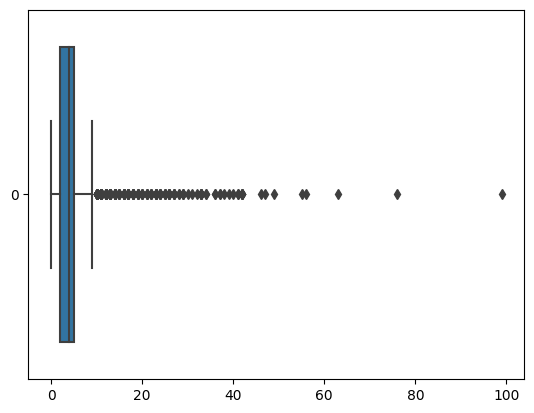

In [15]:
#plt.figure.figsize(6,3)
sns.boxplot(raw["NumberofFloors"], orient="h")

On observe un etallement des données à partire de la valeur 42. Visualisons les données qui ont des valeur égales ou supérieures à ce seuil.

In [16]:
display(raw[raw["NumberofFloors"]>=42].sort_values("NumberofFloors", ascending=False))
print(f"Mediane de la variable PopertyGFATotal: {raw['PropertyGFATotal'].median()}")
print(f"Mediane de la variable SiteEnergyUseWN(kBtu): {raw['SiteEnergyUseWN(kBtu)'].median()}")
print(f"Mediane de la variable TotalGHGEmissions: {raw['TotalGHGEmissions'].median()}")

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,pourcentage_surface_gfa
1359,21611,NonResidential,Worship Facility,Seattle Chinese Baptist Church,5801 Beacon Avenue South,Seattle,WA,98108.0,2124049098,2,...,3.260012e+05,0.000000e+00,9.554550e+04,326001.0,0.000000,0.0,False,Compliant,2.27,0.000000
559,775,NonResidential,Large Office,Columbia Center - 2015,701 5th Avenue,Seattle,WA,98104.0,0942000640,7,...,9.253726e+07,0.000000e+00,2.574791e+07,87851862.0,50857.632810,5085763.0,False,Compliant,882.56,-0.138961
233,357,Nonresidential COS,Large Office,Seattle Municipal Tower (2030),700 Fifth Avenue,Seattle,WA,98104.0,0942000720,3,...,6.157618e+07,0.000000e+00,1.804695e+07,61576180.0,0.000000,0.0,False,Compliant,429.27,-0.120940
292,422,NonResidential,Large Office,Two Union Square,601 Union St.,Seattle,WA,98101.0,1976700125,7,...,5.098450e+07,9.156549e+05,1.350581e+07,46081813.0,25202.298830,2520230.0,False,Compliant,525.78,-0.181307
271,399,NonResidential,Large Office,1201 Third Avenue,1201 3rd ave,Seattle,WA,98101.0,1974700120,7,...,5.514030e+07,2.179488e+06,1.449966e+07,49472833.0,14268.400390,1426840.0,False,Compliant,588.90,-0.289917
229,353,NonResidential,Large Office,Safeco Plaza,1001 Fourth Avenue,Seattle,WA,98154.0,0942000300,7,...,4.751812e+07,0.000000e+00,1.124821e+07,38378889.0,67844.148440,6784415.0,False,Compliant,627.87,-0.279905
221,345,NonResidential,Large Office,999 Third Avenue,"999 3rd Avenue, Suite 1550",Seattle,WA,98104.0,0939000435,7,...,4.468366e+07,0.000000e+00,1.304861e+07,44521844.0,1618.117065,161812.0,False,Compliant,318.97,-0.235757
273,402,NonResidential,Large Office,US Bank Centre,1420 5th Avenue,Seattle,WA,98101.0,1975700080,7,...,5.850684e+07,0.000000e+00,1.572921e+07,53668061.0,29380.699220,2938070.0,False,Compliant,530.18,-0.347651
231,355,NonResidential,Large Office,901 Fifth Avenue,901 Fifth Avenue,Seattle,WA,98164.0,0942000365,7,...,7.156895e+07,8.829835e+05,2.011630e+07,68636822.0,0.000000,0.0,False,Compliant,546.65,-0.058486
256,383,NonResidential,Large Office,Smith Tower,506 Second Avenue,Seattle,WA,98104.0,0939000060,7,...,2.488099e+07,1.014422e+06,3.294180e+06,11239744.0,110080.773400,11008077.0,False,Compliant,741.30,-0.194903


Mediane de la variable PopertyGFATotal: 44098.0
Mediane de la variable SiteEnergyUseWN(kBtu): 1914443.25
Mediane de la variable TotalGHGEmissions: 33.8


Nous constatons que l'observation avec 99 étage a une surface et des indicateurs de consommation d'énergie et d'émission de CO2 très inférieurs à la médiane de ces variables. On peut en déduire que l'observation est aberrrante. 
Les autres observations ont des valeurs bien supérieures aux médianes observées. Nous ne pouvons donc pas la considérer comme aberrante.

In [17]:
raw.drop(index=1359, inplace=True)
print(f"Nombre d'observations restantes: {raw.shape[0]}")

Nombre d'observations restantes: 3170


In [18]:
raw.BuildingType.unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [19]:
raw.head(5).T

,0,1,2,3,4
OSEBuildingID,1,2,3,5,8
BuildingType,NonResidential,NonResidential,NonResidential,NonResidential,NonResidential
PrimaryPropertyType,Hotel,Hotel,Hotel,Hotel,Hotel
PropertyName,Mayflower park hotel,Paramount Hotel,5673-The Westin Seattle,HOTEL MAX,WARWICK SEATTLE HOTEL (ID8)
Address,405 Olive way,724 Pine street,1900 5th Avenue,620 STEWART ST,401 LENORA ST
City,Seattle,Seattle,Seattle,Seattle,Seattle
State,WA,WA,WA,WA,WA
ZipCode,98101.0,98101.0,98101.0,98101.0,98121.0
TaxParcelIdentificationNumber,0659000030,0659000220,0659000475,0659000640,0659000970
CouncilDistrictCode,7,7,7,7,7


### Sélection des bâtiments non destinées à l'habitation

Suppression des bâtiments destinés à l'habitation.  
Je supprime la catégorie Campus, où il peut y avoir des logements.

In [20]:
non_residential_types = ["NonResidential"
                        , 'Nonresidential COS'
                        , 'Nonresidential WA'
]

raw = raw[raw["BuildingType"].isin(non_residential_types)]

### Suppression des variables non pertinentes pour l'analyse

On cherche à prédire une consommation électrique.  
On n'a pas besoin des variables géographiques, sauf Neigborhood et CouncilDistrictCode, car on reste à Seattle.  
On supprime les données de consommation hormis les variables énergétiques.

In [21]:
drop_cols = ['SiteEUI(kBtu/sf)'
              ,'SiteEUIWN(kBtu/sf)'
              ,'SourceEUI(kBtu/sf)'
              ,'SourceEUIWN(kBtu/sf)'
              ,'SteamUse(kBtu)'
              ,'Electricity(kWh)'
              ,'Electricity(kBtu)'
              ,'NaturalGas(therms)'
              ,'NaturalGas(kBtu)'
              ,'PropertyName'
              ,'Address'
              , 'City'
              , 'State'
              , 'ZipCode'
              , 'TaxParcelIdentificationNumber'
       ]

raw.drop(columns=drop_cols, inplace=True)

### Varibales ComplianceStatus et DefaultData

Les deux variables ComplianceStatus et DefaultData ne sont pas détaillées dans la [nomenclature](https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy) des données. 
Afin de vérifier si nous les conservons, nous regardons le nombre d'observations par modalité et la distribution des variables à prédires pour chacune de leurs modalités.

Commençons par ComplianceStatus.

In [22]:
raw.ComplianceStatus.value_counts()

Compliant                       1428
Error - Correct Default Data      12
Name: ComplianceStatus, dtype: int64

Quelques observations donnent le message "Error - Correct Default Data". Comme elles sont peu nombreuses et peut-être porteuses d'une erreur, je les supprime.

In [23]:
raw = raw[raw.ComplianceStatus == "Compliant"]
raw.drop(columns="ComplianceStatus", inplace=True)
print(f"Nombre de variable restantes après la suppresion de la variable ComplianceStatus {raw.shape[1]}")

Nombre de variable restantes après la suppresion de la variable ComplianceStatus 25


Observons maintenant la variable DefaultData.

In [27]:
raw['DefaultData'].unique()

array([False])

On n'observe qu'une seule modalité de DefaultData.  
On supprime donc la colonne.

In [28]:
raw.drop(columns = "DefaultData", inplace=True)
print(f"Nombre de variables restantes {raw.shape[1]}")

Nombre de variables restantes 24


Création de la variable haversine (distance à vol d'oiseau) par rapport au centre de Seattle.
